Алгоритмы растеризации для отрезка или окружности

1. Цифровой дивверенциальный анализатор для отрезка

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image, ImageDraw


def DDALine(x1, y1, x2, y2, color):
    img = Image.new('RGB', (200, 200), 'white')  
    idraw = ImageDraw.Draw(img)
    dx = x2 - x1
    dy = y2 - y1
   
    steps = abs(dx) if abs(dx) > abs(dy) else abs(dy)
         
    Xinc = float(dx / steps)
    Yinc = float(dy / steps)
    
        
    for i in range(0, int(steps + 1)):
        idraw.rectangle([int(x1), int(y1), int(x1), int(y1)], fill = 'red', width=60)
        x1 += Xinc
        y1 += Yinc
    img = img.transpose(method = Image.FLIP_TOP_BOTTOM) 
    img.save('test1.jpg')
    img = Image.open('test1.jpg')  
    img.show()


def main():
    x = float(input("Enter X1: "))
    y = float(input("Enter Y1: "))
    xEnd = float(input("Enter X2: "))
    yEnd = float(input("Enter Y2: "))
    color = "r."
    DDALine(x, y, xEnd, yEnd, color)


if __name__ == '__main__':
    main()


2. Алгоритм Брезенхема для прямой

In [4]:
from PIL import Image, ImageDraw

def draw_line(x0, y0, x1, y1):
    image = Image.new("RGB", (200, 200), color='white')
    draw = ImageDraw.Draw(image)

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while x0 != x1 or y0 != y1:
        image.putpixel((x0, y0), (255, 0, 0))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
    image = image.transpose(method = Image.FLIP_TOP_BOTTOM) 
    image.show()

# Ввод координат
x0 = int(input("Введите x0: "))
y0 = int(input("Введите y0: "))
x1 = int(input("Введите x1: "))
y1 = int(input("Введите y1: "))

draw_line(x0, y0, x1, y1)

3. Алгоритм Брезенхема для окружности

In [5]:
from PIL import Image

def draw_circle(center_x, center_y, radius):
    # Создаем новое изображение
    img = Image.new("RGB", (200, 200), "white")
    pixels = img.load()

    x = radius
    y = 0
    decision_parameter = 1 - radius

    while y <= x:
        # Отображаем точки во всех восьми октантах
        pixels[center_x + x, center_y + y] = (0, 0, 0)
        pixels[center_x - x, center_y + y] = (0, 0, 0)
        pixels[center_x + x, center_y - y] = (0, 0, 0)
        pixels[center_x - x, center_y - y] = (0, 0, 0)
        pixels[center_x + y, center_y + x] = (0, 0, 0)
        pixels[center_x - y, center_y + x] = (0, 0, 0)
        pixels[center_x + y, center_y - x] = (0, 0, 0)
        pixels[center_x - y, center_y - x] = (0, 0, 0)

        y += 1
        if decision_parameter <= 0:
            decision_parameter += 2 * y + 1
        else:
            x -= 1
            decision_parameter += 2 * (y - x) + 1

    # Отображаем изображение
    img.show()

# Ввод координат и радиуса
center_x = int(input("Введите координату X центра окружности: "))
center_y = int(input("Введите координату Y центра окружности: "))
radius = int(input("Введите радиус окружности: "))

# Отрисовка окружности
draw_circle(center_x, center_y, radius)

Задание №2

[['-0.000581696', '-0.734665'], ['0.000283538', '-1'], ['-0.117277', '-0.973564'], ['-0.382144', '-0.890788'], ['-0.247144', '-0.942602'], ['-0.656078', '-0.718512'], ['-0.609847', '-0.786562'], ['-0.66248', '-0.632053'], ['-0.511812', '-0.845392'], ['-0.609326', '-0.569868'], ['-0.426949', '-0.649767'], ['-0.201076', '-0.720822'], ['0.117382', '-0.973645'], ['0.382454', '-0.890869'], ['0.247512', '-0.942667'], ['0.656371', '-0.718624'], ['0.610273', '-0.786562'], ['0.66248', '-0.631463'], ['0.511631', '-0.845357'], ['0.608654', '-0.568839'], ['0.424663', '-0.649937'], ['0.198972', '-0.720968'], ['0.153371', '-0.140519'], ['0.134781', '-0.14723'], ['0.131261', '-0.132153'], ['0.14749', '-0.135105'], ['0.000686924', '-0.0534984'], ['0.075062', '-0.0473306'], ['0.0695841', '-0.0997942'], ['0.0302569', '-0.0971868'], ['0.0745124', '-0.135953'], ['0.0354892', '-0.12785'], ['0.0389268', '-0.109557'], ['0.0734835', '-0.11538'], ['0.106386', '-0.125623'], ['0.107415', '-0.144295'], ['0.15968'

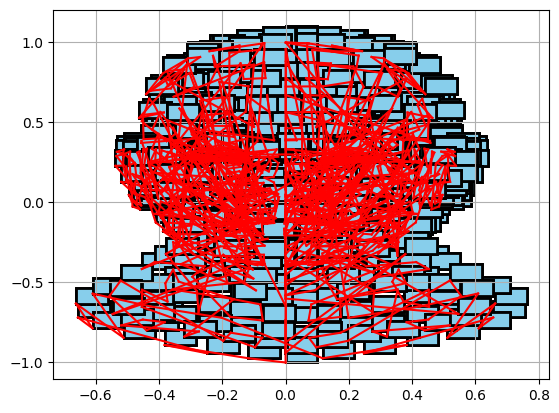

In [6]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
def brez_line(x1, y1, x2, y2):
    ax.plot([x1,x2], [y1, y2], color = 'red')
    dx = x2 - x1
    dy = y2 - y1
        
    sign_x = 0.00001 if dx>0 else -0.00001 if dx<0 else 0
    sign_y = 0.00001 if dy>0 else -0.00001 if dy<0 else 0
        
    if dx < 0: dx = -dx
    if dy < 0: dy = -dy
        
    if dx > dy:
        pdx, pdy = sign_x, 0
        es, el = dy, dx
    else:
        pdx, pdy = 0, sign_y
        es, el = dx, dy
        
    x, y = x1, y1
        
    error, t = el/2, 0        
        
    plt.plot(float(x1), float(y1), color = 'red')
    ax.add_patch (Rectangle((float(x1), float(y1)), 0.1, 0.1, edgecolor = 'black',facecolor = 'skyblue', fill= True , lw= 2 ))
    
        
    while t < el:
        error -= es
        if error < 0:
            error += el
            x += sign_x
            y += sign_y
        else:
            x += pdx
            y += pdy
        t += 1
        plt.plot(x, y, color = 'red')
        ax.add_patch (Rectangle((x, y), 0.1, 0.1, edgecolor = 'black',facecolor = 'skyblue', fill= True , lw= 2 ))
       
f = open(r"C:\Users\USER\Documents\head.txt")
s = []
for i in range(1258):
    line = f.readline()
    s.append(line[2:-1].split()[:2])
print(s)
for i in range(len(s)):
    if i == len(s)-1: 
        break
    koord1 = s[i]
    koord2 = s[i+1] 
    brez_line(float(koord1[0]), float(koord1[1]), float(koord2[0]), float(koord2[1]))
ax.grid()
plt.show()

    

    

In [7]:
from PIL import Image, ImageDraw

# Создание изображения
f = open(r"C:\Users\USER\Documents\head.txt")
coordinates = []
for i in range(1258):
    line = f.readline()
    coordinates.append(line[2:-1].split()[:2])
img = Image.new('RGB', (500, 500), color = 'white')
draw = ImageDraw.Draw(img)

# Приведение координат к целым числам
coordinates = [[int(float(x)*200+250), int(float(y)*200+250)] for x, y in coordinates]

# Рисование линий по координатам
for i in range(len(coordinates) - 1):
    draw.line((coordinates[i][0], coordinates[i][1], coordinates[i+1][0], coordinates[i+1][1]), fill='red', width=1)

# Вывод изображения
img = img.transpose(method = Image.FLIP_TOP_BOTTOM) 
img.show()

Задание на 05.03

Модифицированный алгоритм брезенхема с устранением ступенчатости

In [8]:
from PIL import Image

def bresenham_smooth(x1, y1, x2, y2):
    image = Image.new("RGB", (500, 500), "white")
    pixels = image.load()
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steep = dy > dx
    
    if steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
        
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        
    dx = x2 - x1
    dy = y2 - y1
    gradient = dy / dx
    
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xpxl1 = xend
    ypxl1 = int(yend)
    if steep:
        pixels[ypxl1, xpxl1] = (0, 0, 0)
        pixels[ypxl1 + 1, xpxl1] = (0, 0, 0)
    else:
        pixels[xpxl1, ypxl1] = (0, 0, 0)
        pixels[xpxl1, ypxl1 + 1] = (0, 0, 0)
    intery = yend + gradient
    
    xend = round(x2)
    yend = y2 + gradient * (xend - x2)
    xpxl2 = xend
    ypxl2 = int(yend)
    if steep:
        pixels[ypxl2, xpxl2] = (0, 0, 0)
        pixels[ypxl2 + 1, xpxl2] = (0, 0, 0)
    else:
        pixels[xpxl2, ypxl2] = (0, 0, 0)
        pixels[xpxl2, ypxl2 + 1] = (0, 0, 0)
    
    if steep:
        for x in range(xpxl1 + 1, xpxl2):
            pixels[int(intery), x] = (0, 0, 0)
            pixels[int(intery) + 1, x] = (0, 0, 0)
            intery += gradient
    else:
        for x in range(xpxl1 + 1, xpxl2):
            pixels[x, int(intery)] = (0, 0, 0)
            pixels[x, int(intery) + 1] = (0, 0, 0)
            intery += gradient
    image = image.transpose(method = Image.FLIP_TOP_BOTTOM) 
    image.show()

x1 = int(input("Введите x1: "))
y1 = int(input("Введите y1: "))
x2 = int(input("Введите x2: "))
y2 = int(input("Введите y2: "))

bresenham_smooth(x1, y1, x2, y2)

Алгоритм Сяолини Ву

In [9]:
from PIL import Image, ImageDraw

# Функция для устранения ступенчатости
def xiaolin_wu(img, x1, y1, x2, y2, c):
    dx = x2 - x1
    dy = y2 - y1
    steep = abs(dy) > abs(dx)

    if steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        
    dx = x2 - x1
    dy = y2 - y1
    gradient = dy / dx

    # первая точка
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = 1 - (x1 + 0.5) % 1
    xpxl1 = xend
    ypxl1 = int(yend)
    if steep:
        img.putpixel((ypxl1, xpxl1), int(c * (1 - (yend % 1))))
        img.putpixel((ypxl1 + 1, xpxl1), int(c * (yend % 1)))
    else:
        img.putpixel((xpxl1, ypxl1), int(c * (1 - (yend % 1))))
        
        img.putpixel((xpxl1, ypxl1 + 1), int(c * (yend % 1)))

    # вторая точка
    xend = round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = (x2 + 0.5) % 1
    xpxl2 = xend
    ypxl2 = int(yend)
    if steep:
        img.putpixel((ypxl2, xpxl2), int(c * (1 - (yend % 1))))
        img.putpixel((ypxl2 + 1, xpxl2), int(c * (yend % 1)))
    else:
        img.putpixel((xpxl2, ypxl2), int(c * (1 - (yend % 1))))
        img.putpixel((xpxl2, ypxl2 + 1), int(c * (yend % 1)))

    # основной цикл
    if steep:
        for i in range(int(xpxl1) + 1, int(xpxl2)):
            img.putpixel((int(ypxl1), i), int(c * (1 - (ypxl1 % 1))))
            img.putpixel((int(ypxl1) + 1, i), int(c * (ypxl1 % 1)))
            ypxl1 += gradient
    else:
        for i in range(int(xpxl1) + 1, int(xpxl2)):
            img.putpixel((i, int(ypxl1)),
                         int(c * (1 - (ypxl1 % 1))))
            img.putpixel((i, int(ypxl1) + 1),
                         int(c * (ypxl1 % 1)))
            
            ypxl1 += gradient

# Ввод координат и создание изображения
x1 = int(input("Введите x1: "))
y1 = int(input("Введите y1: "))
x2 = int(input("Введите x2: "))
y2 = int(input("Введите y2: "))
c = int(input("Введите интенсивность цвета (0-255): "))

img = Image.new('RGB', (100, 100), color = 'white')
draw = ImageDraw.Draw(img)
draw.line((x1, y1, x2, y2), fill="black", width=1)

# Вызов функции для устранения ступенчатости
xiaolin_wu(img, x1, y1, x2, y2, c)

# Вывод изображения
img.transpose(method = Image.FLIP_TOP_BOTTOM)
img.show()

Алгоритм со списком реберных точек

In [10]:
from PIL import Image, ImageDraw

def draw_polygon(edges, width, height):
    img = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(img)


    for edge in edges:
        x1, y1, x2, y2 = edge
        draw.line([(x1, y1), (x2, y2)], fill="black")

    
    fill_color = (255, 0, 0) 
    flood_fill(img, width // 2, height // 2, fill_color)

    img.show()

def flood_fill(image, x, y, fill_color):
    width, height = image.size
    orig_color = image.getpixel((x, y))
    if orig_color == fill_color:
        return
    queue = [(x, y)]
    while queue:
        x, y = queue.pop(0)
        if (
            0 <= x < width
            and 0 <= y < height
            and image.getpixel((x, y)) == orig_color
        ):
            image.putpixel((x, y), fill_color)
            queue.append((x + 1, y))
            queue.append((x - 1, y))
            queue.append((x, y + 1))
            queue.append((x, y - 1))

edges = [(150, 100, 200, 100), (200, 100, 200, 200), (200, 200, 140, 280), (140, 280, 150, 100)]

width = 300
height = 300

draw_polygon(edges, width, height)

Алгоритм с затравкой

In [11]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (500, 500), (255, 255, 255))
draw = ImageDraw.Draw(image)

seed_color = (255, 0, 0)

fill_color = (0, 255, 0)

draw.polygon([(150, 150), (280, 100), (450, 380), (80, 430)], outline=(0, 255, 0), width=2)

seed_point = (250, 250)

queue = [seed_point]


while queue:
   
    x, y = queue.pop(0)

  
    if x < 0 or x >= image.width or y < 0 or y >= image.height:
        continue

    if image.getpixel((x, y)) == fill_color:
        continue

    draw.point((x, y), fill_color)

    queue.append((x + 1, y))
    queue.append((x - 1, y))
    queue.append((x, y + 1))
    queue.append((x, y - 1))

image.show()

Алгоритм с построчной затравкой

In [12]:
from PIL import Image, ImageDraw

def flood_fill(image, x, y, new_color):

  width, height = image.size

  stack = [(x, y)]

  old_color = image.getpixel((x, y))

  while stack:
    x, y = stack.pop()

    if image.getpixel((x, y)) == old_color:
  
      image.putpixel((x, y), new_color)

      if x > 0:
        stack.append((x-1, y))
      if y > 0:
        stack.append((x, y-1))
      if x < width-1:
        stack.append((x+1, y))
      if y < height-1:
        stack.append((x, y+1))

image = Image.new("RGB", (500, 500), "white")

draw = ImageDraw.Draw(image)
draw.polygon([(20, 20), (40, 450), (460, 400), (450, 30), (220, 180)], outline=(0, 255, 0), width=2)

flood_fill(image, 40, 40, (255, 0, 0))

image.show()

Двумерный алгоритм Коэна Сазерленда

In [13]:
from PIL import Image


INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8


def compute_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT
    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP
    return code


def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = compute_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = compute_code(x2, y2, xmin, ymin, xmax, ymax)
    
    accept = False
    
    while True:
        if code1 == 0 and code2 == 0:
            accept = True
            break
        elif code1 & code2 != 0:
            break
        else:
            x = 0
            y = 0
            code_out = code1 if code1 != 0 else code2
            
            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin
            
            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_code(x1, y1, xmin, ymin, xmax, ymax)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2, xmin, ymin, xmax, ymax)
    
    if accept:
        draw_line(x1, y1, x2, y2)
        

def draw_line(x1, y1, x2, y2):
    global image
    from PIL import ImageDraw
    draw = ImageDraw.Draw(image)
    draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=2)
    draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=(0, 255, 0), width=2)



x1 = int(input("Введите x1: "))
y1 = int(input("Введите y1: "))
x2 = int(input("Введите x2: "))
y2 = int(input("Введите y2: "))
xmin = int(input("Введите xmin: "))
ymin = int(input("Введите ymin: "))
xmax = int(input("Введите xmax: "))
ymax = int(input("Введите ymax: "))


image = Image.new('RGBA', (500, 500), 'white')  # Cоздаем черное изображение размером 100x100
cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax)

# Показ изображения
image.show()

FC - алгоритм

In [14]:
from PIL import Image, ImageDraw
import numpy as np

def fc_clip(P1, P2, P3, P4):
   
    # Выходные коды
    INSIDE = 0  # точка внутри прямоугольника
    LEFT = 1  # точка слева от прямоугольника
    RIGHT = 2  # точка справа от прямоугольника
    BOTTOM = 4  # точка под прямоугольником
    TOP = 8  # точка над прямоугольником

    
    output = []


    c1 = compute_codes(P1, P3, P4)
    c2 = compute_codes(P2, P3, P4)

  
    while c1 | c2 != 0:
      
        if c1 & c2 != 0:
            return output

    
        if c1 != 0:
           
            if c1 & LEFT:
                P1 = intersect(P1, P2, P3, (P3[0], P1[1]))
            elif c1 & RIGHT:
                P1 = intersect(P1, P2, (P4[0], P1[1]), P4)
            elif c1 & BOTTOM:
                P1 = intersect(P1, P2, P3, (P1[0], P3[1]))
            elif c1 & TOP:
                P1 = intersect(P1, P2, (P1[0], P4[1]), P4)
            
        
            c1 = compute_codes(P1, P3, P4)
        
   
        if c2 != 0:
          
            if c2 & LEFT:
                P2 = intersect(P1, P2, P3, (P3[0], P2[1]))
            elif c2 & RIGHT:
                P2 = intersect(P1, P2, (P4[0], P2[1]), P4)
            elif c2 & BOTTOM:
                P2 = intersect(P1, P2, P3, (P2[0], P3[1]))
            elif c2 & TOP:
                P2 = intersect(P1, P2, (P2[0], P4[1]), P4)

            
            c2 = compute_codes(P2, P3, P4)

 
    output.append(P1)
    output.append(P2)

    return output

def compute_codes(P, P3, P4):

    code = INSIDE

    if P[0] < P3[0]:  # слева
        code |= LEFT
    elif P[0] > P4[0]:  # справа
        code |= RIGHT
    if P[1] < P3[1]:  # снизу
        code |= BOTTOM
    elif P[1] > P4[1]:  # сверху
        code |= TOP

    return code

def intersect(P1, P2, P3, P4):

    x1, y1 = P1
    x2, y2 = P2
    x3, y3 = P3
    x4, y4 = P4

    uA = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / ((y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1))
    uB = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / ((y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1))

    if uA >= 0 and uA <= 1 and uB >= 0 and uB <= 1:
        x = x1 + (uA * (x2 - x1))
        y = y1 + (uA * (y2 - y1))
        return x, y

    return None

def main():
    # Ввод границ отрезка и прямоугольника
    x1, y1, x2, y2 = map(int, input("Введите координаты отрезка (x1, y1, x2, y2): ").split())
    x3, y3, x4, y4 = map(int, input("Введите координаты прямоугольника (x3, y3, x4, y4): ").split())

    # Отсечение отрезка
    output = fc_clip((x1, y1), (x2, y2), (x3, y3), (x4, y4))

    # Создание изображения с прозрачным фоном
    img = Image.new("RGBA", (100, 100), (0, 0, 0, 0))

    # Рисование отрезка и прямоугольника
    draw = ImageDraw.Draw(img)
    draw.line([(x1, y1), (x2, y2)], fill=(255, 0, 0), width=2)
    draw.rectangle([(x3, y3), (x4, y4)], outline=(0, 255, 0), width=2)

    # Рисование отсеченного отрезка, если он есть
    if len(output) == 2:
        draw.line(output, fill=(0, 0, 255), width=2)

    # Вывод изображения
    img.show()

if __name__ == "__main__":
    main()

ValueError: not enough values to unpack (expected 4, got 1)

Алгоритм Лианга Барски

In [ ]:
from PIL import Image, ImageDraw
import numpy as np


def liang_barsky(x_min, y_min, x_max, y_max, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    p = [-dx, dx, -dy, dy]
    q = [x1 - x_min, x_max - x1, y1 - y_min, y_max - y1]
    t_enter = 0.0
    t_exit = 1.0

    for i in range(4):
        if p[i] == 0:  # Check if line is parallel to the clipping boundary
            if q[i] < 0:
                return None  # Line is outside and parallel, so completely discarded
        else:
            t = q[i] / p[i]
            if p[i] < 0:
                if t > t_enter:
                    t_enter = t
            else:
                if t < t_exit:
                    t_exit = t

    if t_enter > t_exit:
        return None  # Line is completely outside

    x1_clip = x1 + t_enter * dx
    y1_clip = y1 + t_enter * dy
    x2_clip = x1 + t_exit * dx
    y2_clip = y1 + t_exit * dy

    return x1_clip, y1_clip, x2_clip, y2_clip


x1, y1, x2, y2 = map(int, input("Введите координаты отрезка (x1, y1, x2, y2): ").split())
x_min, y_min, x_max, y_max = map(int, input("Введите координаты прямоугольника (x3, y3, x4, y4): ").split())

# Apply the Liang-Barsky algorithm to clip the line
clipped_line = liang_barsky(x_min, y_min, x_max, y_max, x1, y1, x2, y2)
x1_new, y1_new, x2_new, y2_new = clipped_line
img = Image.new("RGBA", (300, 300), (0, 0, 0, 0))

    # Рисование отрезка и прямоугольника
draw = ImageDraw.Draw(img)
draw.line([(x1_new, y1_new), (x2_new, y2_new)], fill=(255, 0, 0), width=2)
draw.rectangle([(x_min, y_min), (x_max, y_max)], outline=(0, 255, 0), width=2)
img.show()


KeyboardInterrupt: Interrupted by user

Алгоритм Кируса Бека

In [8]:
from PIL import Image, ImageDraw

def inside(p, edge):
    return edge[0][0]*(p[1] - edge[1][1]) + edge[0][1]*(edge[1][0] - p[0]) + (edge[1][1]*edge[0][0] - edge[0][1]*edge[1][0]) > 0

def intersection(p1, p2, edge):
    return inside(p1, edge) != inside(p2, edge)

def cyrus_beck(polygon, p1, p2):
    n = len(polygon)
    t_min = 0
    t_max = 1

    for i in range(n):
        edge = (polygon[i], polygon[(i+1)%n])
        norm = (edge[1][1] - edge[0][1], edge[0][0] - edge[1][0])
        dir = (p2[0] - p1[0], p2[1] - p1[1])
        dist = (edge[0][0] - p1[0], edge[0][1] - p1[1])

        numerator = norm[0] * dist[0] + norm[1] * dist[1]
        denominator = norm[0] * dir[0] + norm[1] * dir[1]

        if denominator == 0:
            if numerator < 0:
                return None
        else:
            t = numerator / denominator

            if denominator < 0:
                t_min = max(t_min, t)
            else:
                t_max = min(t_max, t)

    if t_min <= t_max:
        return ((int(p1[0] + t_min * (p2[0] - p1[0])), int(p1[1] + t_min * (p2[1] - p1[1])),
                int(p1[0] + t_max * (p2[0] - p1[0])), int(p1[1] + t_max * (p2[1] - p1[1]))))
    else:
        return None

# Ввод координат отрезка и многоугольника
polygon = [(250, 100), (300, 250), (150, 370), (100, 300)]
line = (200, 50, 200, 350)

# Создание изображения
img = Image.new('RGB', (400, 400), color='white')
draw = ImageDraw.Draw(img)

# Рисование многоугольника
draw.polygon(polygon, outline='black')

# Отсечение отрезка
result = cyrus_beck(polygon, (line[0], line[1]), (line[2], line[3]))
if result:
    draw.line(result, fill='red')
else:
    draw.line((line[0], line[1], line[2], line[3]), fill='black')

# Вывод изображения
img.show()

Закраска головы

In [1]:
from PIL import Image, ImageDraw
import numpy as np
from random import *


f = open(r"C:\Users\USER\Desktop\Рабочее\head.txt")
c = open(r"C:\Users\USER\Desktop\Рабочее\head2.txt")
coordinates = []
for i in range(1258):
    line = f.readline()
    coordinates.append(line[2:-1].split()[:2])
img = Image.new('RGB', (1500, 1500), color = 'white')
draw = ImageDraw.Draw(img)
draw_filled = ImageDraw.Draw(img)
lines = c.readlines()
numbers = []
for line in lines:
    if line[0] == 'f':
        b = []
        line = line.split()
        b.append(line[1].split('/')[0])
        b.append(line[2].split('/')[0])
        b.append(line[3].split('/')[0])         
        numbers.append(b)


coordinates = [[int(float(x)*250+250), int(float(y)*250+250)] for x, y in coordinates]
colors = [(randint(0, 255), randint(0, 255), randint(0, 255)) for _ in range(len(numbers))]


points_matrix = np.array([[x, y, 1] for x, y in coordinates]).T

# Параллельный перенос на вектор (tx, ty)
tx = 250
ty = 350
translation_matrix = np.array([[1, 0, tx],
                                [0, 1, ty],
                                [0, 0, 1]])
translated_points = np.dot(translation_matrix, points_matrix)

# Масштабирование по коэффициентам (sx, sy)
sx = 2
sy = 1.5
scale_matrix = np.array([[sx, 0, 0],
                          [0, sy, 0],
                          [0, 0, 1]])
scaled_points = np.dot(scale_matrix, points_matrix)

# Поворот на угол theta (в радианах)
import math
theta = math.radians(45)
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta), 0],
                            [math.sin(theta), math.cos(theta), 0],
                            [0, 0, 1]])
rotated_points = np.dot(rotation_matrix, points_matrix)

# Вывод результата
translated_coordinates = list(zip(translated_points[0], translated_points[1]))
scaled_coordinates = list(zip(scaled_points[0], scaled_points[1]))
rotated_coordinates = list(zip(rotated_points[0], rotated_points[1]))

c = int(input('Введите 1, чтобы увидеть исходное изображение; 2 - с параллельным переносом; 3 - масштабированное; 4 - изображение с поворотом'))

if c == 1:
    for i, x in enumerate(numbers):
        triangle = [coordinates[int(x[0])-1][0], coordinates[int(x[0])-1][1],coordinates[int(x[1])-1][0], coordinates[int(x[1])-1][1],coordinates[int(x[2])-1][0], coordinates[int(x[2])-1][1]]
        draw_filled.polygon(triangle, fill=colors[i], outline = 'red')
elif c == 2:
    for i, x in enumerate(numbers):
            triangle = [translated_coordinates[int(x[0])-1][0], translated_coordinates[int(x[0])-1][1],translated_coordinates[int(x[1])-1][0], translated_coordinates[int(x[1])-1][1],translated_coordinates[int(x[2])-1][0], translated_coordinates[int(x[2])-1][1]]
            draw_filled.polygon(triangle, fill=colors[i], outline = 'red')
elif c == 3:
    for i, x in enumerate(numbers):
            triangle = [scaled_coordinates[int(x[0])-1][0], scaled_coordinates[int(x[0])-1][1],scaled_coordinates[int(x[1])-1][0], scaled_coordinates[int(x[1])-1][1],scaled_coordinates[int(x[2])-1][0], scaled_coordinates[int(x[2])-1][1]]
            draw_filled.polygon(triangle, fill=colors[i], outline = 'red')
elif c == 4:
    for i, x in enumerate(numbers):
            triangle = [rotated_coordinates[int(x[0])-1][0], rotated_coordinates[int(x[0])-1][1],rotated_coordinates[int(x[1])-1][0], rotated_coordinates[int(x[1])-1][1],rotated_coordinates[int(x[2])-1][0], rotated_coordinates[int(x[2])-1][1]]
            draw_filled.polygon(triangle, fill=colors[i], outline = 'red')   

# Вывод изображения
img = img.transpose(method = Image.FLIP_TOP_BOTTOM) 
img.show()



Алгоритм Сазерленда - Ходгмана

In [10]:
from PIL import Image, ImageDraw

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def sutherland_hodgman_polygon_clip(subject_polygon, clip_polygon):
    output_list = subject_polygon
    clip_edges = len(clip_polygon)

    for i in range(clip_edges):
        edge = [clip_polygon[i], clip_polygon[(i + 1) % clip_edges]]
        input_list = output_list
        output_list = []

        for j in range(len(input_list)):
            current_point = input_list[j]
            prev_point = input_list[(j - 1) % len(input_list)]

            if is_inside(current_point, edge):
                if not is_inside(prev_point, edge):
                    output_list.append(compute_intersection(prev_point, current_point, edge))
                    
                output_list.append(current_point)
            elif is_inside(prev_point, edge):
                output_list.append(compute_intersection(prev_point, current_point, edge))
    
    return output_list

def is_inside(point, edge):
    return (edge[1].x - edge[0].x) * (point.y - edge[0].y) > (edge[1].y - edge[0].y) * (point.x - edge[0].x)

def compute_intersection(prev_point, current_point, edge):
    dx = current_point.x - prev_point.x
    dy = current_point.y - prev_point.y

    edge_dx = edge[1].x - edge[0].x
    edge_dy = edge[1].y - edge[0].y

    if edge_dx == 0:
        edge_dx = 1
    if dx == 0:
        dx = 1

    k_edge = edge_dy / edge_dx
    k = dy / dx

    x = (k * prev_point.x - k_edge * edge[0].x + edge[0].y - prev_point.y) / (k - k_edge)
    y = prev_point.y + k * (x - prev_point.x)

    return Point(int(x), int(y))

img = Image.new('RGB', (500, 500), color='white')
draw = ImageDraw.Draw(img)

subject_polygon = [Point(100, 250), Point(250, 50), Point(450, 350), Point(200, 400)]
clip_polygon = [Point(100, 100), Point(450, 200), Point(450, 400), Point(150, 300)]

result_polygon = sutherland_hodgman_polygon_clip(subject_polygon, clip_polygon)

draw.polygon([(p.x, p.y) for p in clip_polygon], outline='green')

draw.polygon([(p.x, p.y) for p in subject_polygon], outline='black')

draw.polygon([(p.x, p.y) for p in result_polygon], outline='red', width = 3)

img.save('output.png')
img.show()

In [22]:
from PIL import Image, ImageDraw
import numpy as np

def weiler_atherton_clip(subject_polygon, clip_polygon):
    output_polygon = []

    subject_polygon = np.array(subject_polygon)
    clip_polygon = np.array(clip_polygon)

    for edge in clip_polygon:
        output_polygon = weiler_atherton_edge_clip(subject_polygon, edge)
        subject_polygon = output_polygon

    return output_polygon

def weiler_atherton_edge_clip(polygon, edge):
    output_polygon = []

    e0 = edge[0]
    e1 = edge[1]

    for i in range(len(polygon)):
        p0 = polygon[i]
        p1 = polygon[(i + 1) % len(polygon)]

        o0 = orientation(e0, e1, p0)
        o1 = orientation(e0, e1, p1)

        if o0 != o1:
            output_polygon.append(get_intersection(e0, e1, p0, p1))

        if o0 <= 0:
            output_polygon.append(p0)

    return output_polygon

def orientation(p0, p1, p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return (y1 - y0) * (x2 - x1) - (x1 - x0) * (y2 - y1)

def get_intersection(e0, e1, p0, p1):
    x0, y0 = e0
    x1, y1 = e1
    x2, y2 = p0
    x3, y3 = p1

    denominator = (x1 - x0) * (y2 - y3) - (y1 - y0) * (x2 - x3)

    if denominator == 0:
        return None

    ua = ((x0 - x2) * (y2 - y3) - (y0 - y2) * (x2 - x3)) / denominator
    ub = ((x2 - x0) * (y1 - y0) - (y2 - y0) * (x1 - x0)) / denominator

    if ua >= 0 and ua <= 1 and ub >= 0 and ub <= 1:
        return x0 + ua * (x1 - x0), y0 + ua * (y1 - y0)

    return None

subject_polygon = [(0, 0), (100, 0), (100, 100), (0, 100)]
clip_polygon = [(25, 25), (75, 25), (75, 75), (25, 75)]

output_polygon = weiler_atherton_clip(subject_polygon, clip_polygon)

image = Image.new("RGB", (150, 150), (255, 255, 255))
draw = ImageDraw.Draw(image)

draw.polygon(subject_polygon, fill=(0, 255, 0))
draw.polygon(clip_polygon, fill=(0, 0, 255))
draw.polygon(output_polygon, fill=(255, 0, 0))

# Сохранение изображения
image.save("отсеченный_многоугольник.png")

TypeError: cannot unpack non-iterable numpy.int32 object